In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

pathf = 'C:/Users/Hi tech/Downloads/PYTHON PROJECTS/data science project/Sales_Data'
list_file = os.listdir(pathf)
dfs = []
for file in list_file:
    if file.endswith('.csv'):
        file_path = os.path.join(pathf,file)
        sales_temp = pd.read_csv(file_path)
        dfs.append(sales_temp)
sales_df = pd.concat(dfs)
sales_df.to_csv('merged_data.csv')

In [3]:
data = pd.read_csv('merged_data.csv')
data.dropna(inplace=True)
data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [4]:
nan_val = data[data.isna().any(axis = 1)]
nan_val 

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [5]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors='coerce')
data['Price Each'] = pd.to_numeric(data['Price Each'], errors='coerce')
data['sales'] = data['Price Each'] * data['Quantity Ordered']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        186305 non-null  int64  
 1   Order ID          186305 non-null  object 
 2   Product           186305 non-null  object 
 3   Quantity Ordered  185950 non-null  float64
 4   Price Each        185950 non-null  float64
 5   Order Date        186305 non-null  object 
 6   Purchase Address  186305 non-null  object 
 7   sales             185950 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.9+ MB


In [8]:
data['month'] = data['Order Date'].str[0:2]
data['month'] = pd.to_numeric(data['month'],errors='coerce')
data['month_name'] = data['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
                                   7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4.0,April
2,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4.0,April
3,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0,April
4,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0,April
5,5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4.0,April
...,...,...,...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9.0,September
186846,11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9.0,September
186847,11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9.0,September
186848,11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9.0,September


In [15]:
data.drop('Unnamed: 0',axis = 1, inplace= True)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4.0,April
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4.0,April
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0,April
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0,April
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4.0,April
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9.0,September
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9.0,September
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9.0,September
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9.0,September


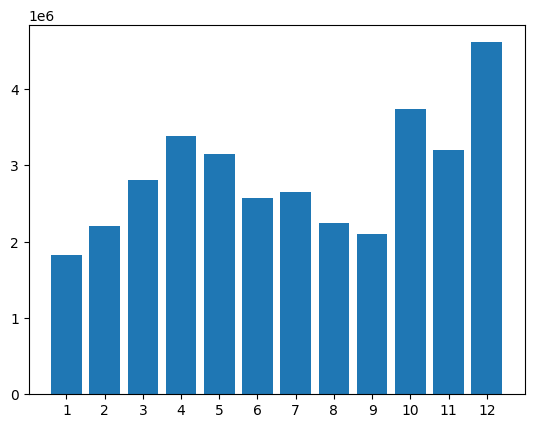

In [33]:
results = data.groupby('month').sum()
months = range(1,13)
plt.bar(months,results['sales'])
plt.xticks(months)
plt.show()


In [49]:
data['city'] = data['Purchase Address'].apply(lambda x : x.split(',')[1] if len(x.split(',')) > 1 else None)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4.0,April,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4.0,April,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0,April,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0,April,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4.0,April,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9.0,September,Los Angeles
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9.0,September,San Francisco
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9.0,September,San Francisco
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9.0,September,San Francisco


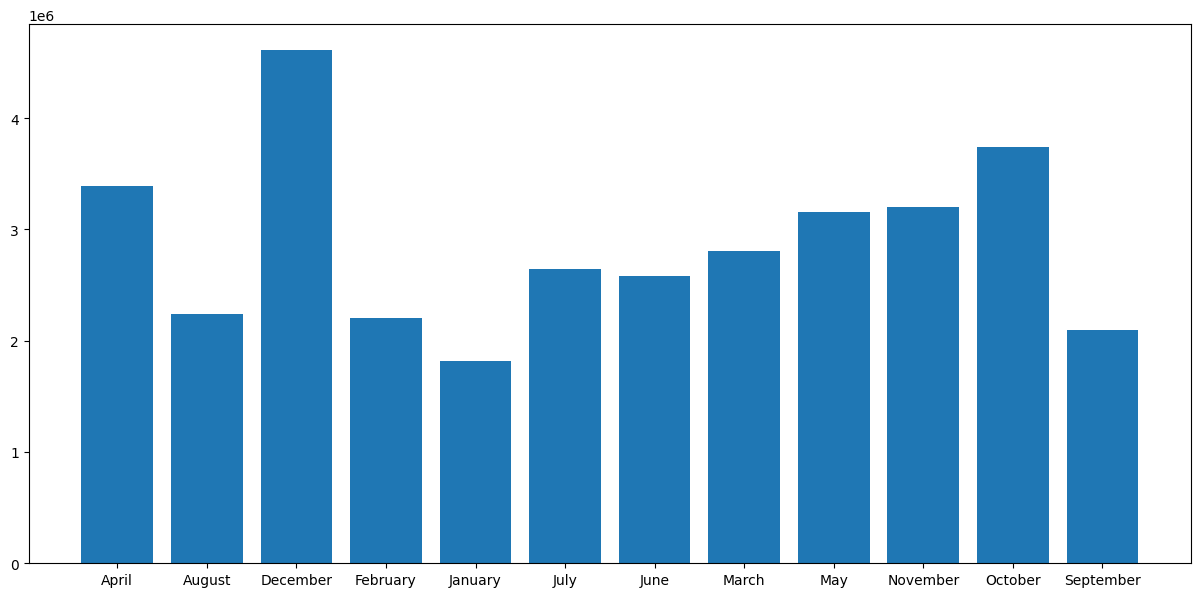

In [72]:
st = data.groupby('month_name')['sales'].sum()
plt.figure(figsize=(15,7))
plt.bar(st.index,st.values)
plt.show()

In [96]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%y %H:%M')
data['hours'] = data['Order Date'].dt.hour
data['minutes'] = data['Order Date'].dt.minute
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name,city,hours,minutes
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4.0,April,Dallas,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4.0,April,Boston,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0,April,Los Angeles,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0,April,Los Angeles,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4.0,April,Los Angeles,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9.0,September,Los Angeles,20,56
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9.0,September,San Francisco,16,0
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9.0,September,San Francisco,7,39
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9.0,September,San Francisco,17,30
